In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load, filter for STARFRUIT, and process a CSV file
def load_process_csv_starfruit(file_path):
    df = pd.read_csv(file_path, delimiter=';')
    # Filter for STARFRUIT
    df_starfruit = df[df['product'] == 'STARFRUIT']
    
    if not df_starfruit.empty:
        open_price = df_starfruit['mid_price'].iloc[0]
        high_price = df_starfruit['mid_price'].max()
        low_price = df_starfruit['mid_price'].min()
        close_price = df_starfruit['mid_price'].iloc[-1]
        return open_price, high_price, low_price, close_price, df_starfruit
    else:
        return None, None, None, None, df_starfruit

# Paths to the CSV files
file_paths = [
    'prices_round_1_day_-2.csv',
    'prices_round_1_day_-1.csv',
    'prices_round_1_day_0.csv'
]

# Iterate through each file path, load, and process the data for STARFRUIT
for i, file_path in enumerate(file_paths, start=-2):
    open_price, high_price, low_price, close_price, df_starfruit = load_process_csv_starfruit(file_path)
    if df_starfruit.empty:
        print(f"Day {i}: No STARFRUIT data available.")
    else:
        print(f"Day {i} OHLC for STARFRUIT: Open={open_price}, High={high_price}, Low={low_price}, Close={close_price}")
        # Calculate and display volatility
        volatility = df_starfruit['mid_price'].std()
        print(f"Day {i} Volatility for STARFRUIT: {volatility}")

# If you wish to perform further analysis or trend identification,
# you could combine the STARFRUIT data from all days as shown previously.
# Note: Adjust the file paths as necessary to match your file locations.


Day -2 OHLC for STARFRUIT: Open=5000.0, High=5062.5, Low=4950.5, Close=5045.5
Day -2 Volatility for STARFRUIT: 32.75140250778001
Day -1 OHLC for STARFRUIT: Open=5046.0, High=5084.5, Low=5017.5, Close=5038.5
Day -1 Volatility for STARFRUIT: 13.575897144418418
Day 0 OHLC for STARFRUIT: Open=5039.5, High=5093.5, Low=5027.0, Close=5051.0
Day 0 Volatility for STARFRUIT: 11.717388685934324


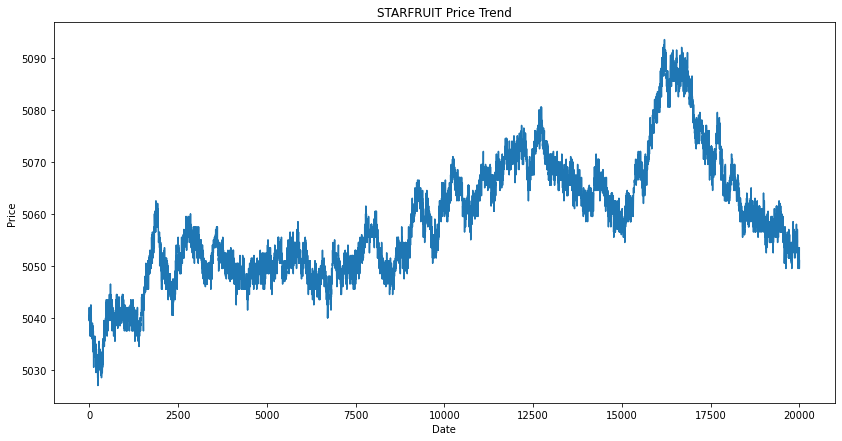

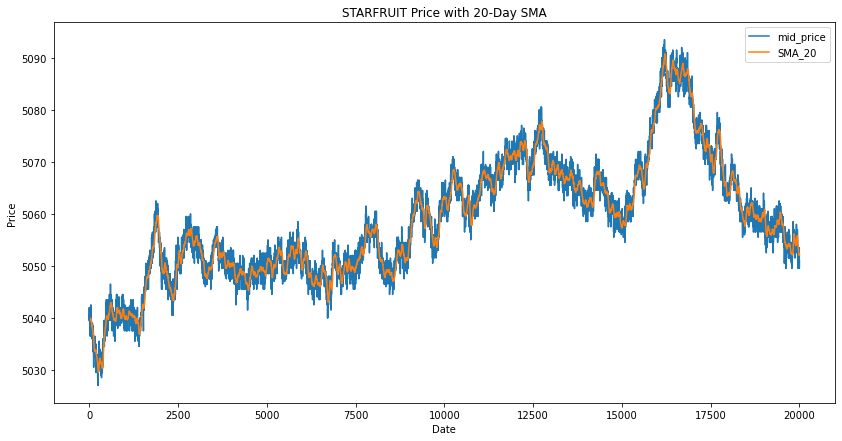

In [14]:
df_starfruit['mid_price'].plot(figsize=(14, 7))
plt.title('STARFRUIT Price Trend')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

# Calculating a simple moving average for trend visualization
df_starfruit['SMA_20'] = df_starfruit['mid_price'].rolling(window=20).mean()
df_starfruit[['mid_price', 'SMA_20']].plot(figsize=(14, 7))
plt.title('STARFRUIT Price with 20-Day SMA')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [18]:
def calculate_bollinger_bands(prices, window=20, num_std_dev=2):
    rolling_mean = prices.rolling(window).mean()
    rolling_std = prices.rolling(window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return rolling_mean, upper_band, lower_band

# Calculate Bollinger Bands
mid_prices = df_starfruit['mid_price']
rolling_mean, upper_band, lower_band = calculate_bollinger_bands(mid_prices)

# Add Bollinger Bands to the DataFrame
df_starfruit['rolling_mean'] = rolling_mean
df_starfruit['upper_band'] = upper_band
df_starfruit['lower_band'] = lower_band


# Calculate Autocorrelation for different lags
for lag in range(1, 6):  # For lags 1 to 5
    autocorr = df_starfruit['mid_price'].autocorr(lag)
    print(f"Autocorrelation with lag {lag}: {autocorr}")

def detect_price_jumps(prices, threshold):
    price_changes = prices.diff()
    jumps = price_changes[abs(price_changes) > threshold]
    return jumps

# Detect price jumps
jumps = detect_price_jumps(df_starfruit['mid_price'], threshold=10)  # Set your own threshold
df_starfruit['price_jumps'] = jumps

# Assuming 'timestamp' is a UNIX timestamp
df_starfruit['timestamp'] = pd.to_datetime(df_starfruit['timestamp'], unit='ms')  # unit depends on your timestamp format
df_starfruit['time_of_day'] = df_starfruit['timestamp'].dt.time

# Group by time of day and calculate average mid_price
time_of_day_effects = df_starfruit.groupby('time_of_day')['mid_price'].mean()
print(time_of_day_effects)


Autocorrelation with lag 1: 0.9897248795121704
Autocorrelation with lag 2: 0.989136001116326
Autocorrelation with lag 3: 0.9883562018047649
Autocorrelation with lag 4: 0.9878922680844953
Autocorrelation with lag 5: 0.9871694831550664
time_of_day
00:00:00           5039.5
00:00:00.100000    5042.0
00:00:00.200000    5040.0
00:00:00.300000    5040.5
00:00:00.400000    5039.5
                    ...  
00:16:39.500000    5052.5
00:16:39.600000    5051.0
00:16:39.700000    5053.5
00:16:39.800000    5049.5
00:16:39.900000    5051.0
Name: mid_price, Length: 10000, dtype: float64
